In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop


In [3]:
picture_size = 48
folder_path = r"C:\Users\hp\Documents\emotion\images"


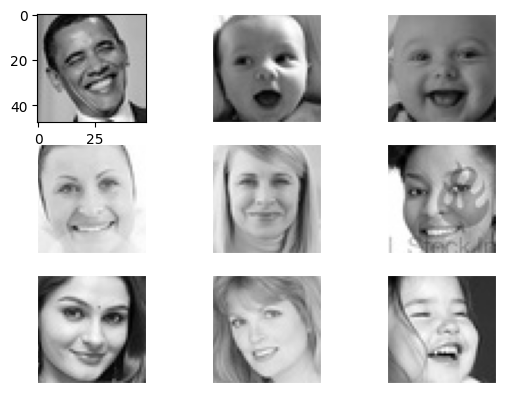

In [4]:
expression = 'happy'
train_folder_path = os.path.join(folder_path, 'train', expression)
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    image_files = os.listdir(train_folder_path)
    img_path = os.path.join(train_folder_path, image_files[i])
    img = load_img(img_path, target_size=(picture_size, picture_size))
    plt.style.use('dark_background')
    plt.imshow(img)
      

plt.show()

In [9]:

batch_size = 128
picture_size = 48  # Make sure this matches the size you used earlier

# Define the directory where your images are stored
folder_path = r"C:\Users\hp\Documents\emotion\images"  # Ensure the path is correct

# Check if directories exist
train_dir = os.path.join(folder_path, 'train')
test_dir = os.path.join(folder_path, 'test')

if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Train directory does not exist: {train_dir}")

if not os.path.exists(test_dir):
    raise FileNotFoundError(f"Validation directory does not exist: {test_dir}")

# Create ImageDataGenerators
datagen_train = ImageDataGenerator()
datagen_val = ImageDataGenerator()

# Setup training data generator
train_set = datagen_train.flow_from_directory(
    train_dir,
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Setup validation data generator
test_set = datagen_val.flow_from_directory(
    test_dir,
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Check class indices
print("Class indices:", train_set.class_indices)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Class indices: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [10]:
no_of_classes = 7

model = Sequential()
model.add(Input(shape=(picture_size, picture_size, 1)))  # Specify the input shape here

# Add layers
model.add(Conv2D(32, (3, 3), activation='relu'))

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 46, 46, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 46, 46, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 46, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 23, 23, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 23, 23, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 11, 11, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 11, 11, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 5, 5, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 5, 5, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,841,543 (14.65 MB)

 Trainable params: 3,837,575 (14.64 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [11]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=3,
    verbose=1,
    restore_best_weights=True
)

reduce_learningrate = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_delta=0.0001
)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])


In [12]:
history = model.fit(
    train_set,
    steps_per_epoch=train_set.samples // train_set.batch_size,
    epochs=epochs,
    validation_data=test_set,
    validation_steps=test_set.samples // test_set.batch_size,
    callbacks=callbacks_list
)


Epoch 1/48


C:\python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2431 - loss: 1.9859
Epoch 1: val_accuracy improved from -inf to 0.40952, saving model to ./model.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 883s 4s/step - accuracy: 0.2433 - loss: 1.9851 - val_accuracy: 0.4095 - val_loss: 1.5749 - learning_rate: 0.0010
Epoch 2/48
  1/225 ━━━━━━━━━━━━━━━━━━━━ 10:01 3s/step - accuracy: 0.3984 - loss: 1.5504

C:\python\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_accuracy did not improve from 0.40952
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3984 - loss: 1.5504 - val_accuracy: 0.3846 - val_loss: 1.9164 - learning_rate: 0.0010
Epoch 3/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.4317 - loss: 1.4718 
Epoch 3: val_accuracy improved from 0.40952 to 0.50185, saving model to ./model.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 3827s 17s/step - accuracy: 0.4318 - loss: 1.4716 - val_accuracy: 0.5018 - val_loss: 1.3012 - learning_rate: 0.0010
Epoch 4/48
  1/225 ━━━━━━━━━━━━━━━━━━━━ 10:22 3s/step - accuracy: 0.5781 - loss: 1.2548
Epoch 4: val_accuracy improved from 0.50185 to 0.65385, saving model to ./model.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5781 - loss: 1.2548 - val_accuracy: 0.6538 - val_loss: 0.8996 - learning_rate: 0.0010
Epoch 5/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5157 - loss: 1.2667
Epoch 5: val_accuracy did not improve from 0.65385
225/225 ━━━━━━━━━━━━━━━━━━━━ 812s 4s/st

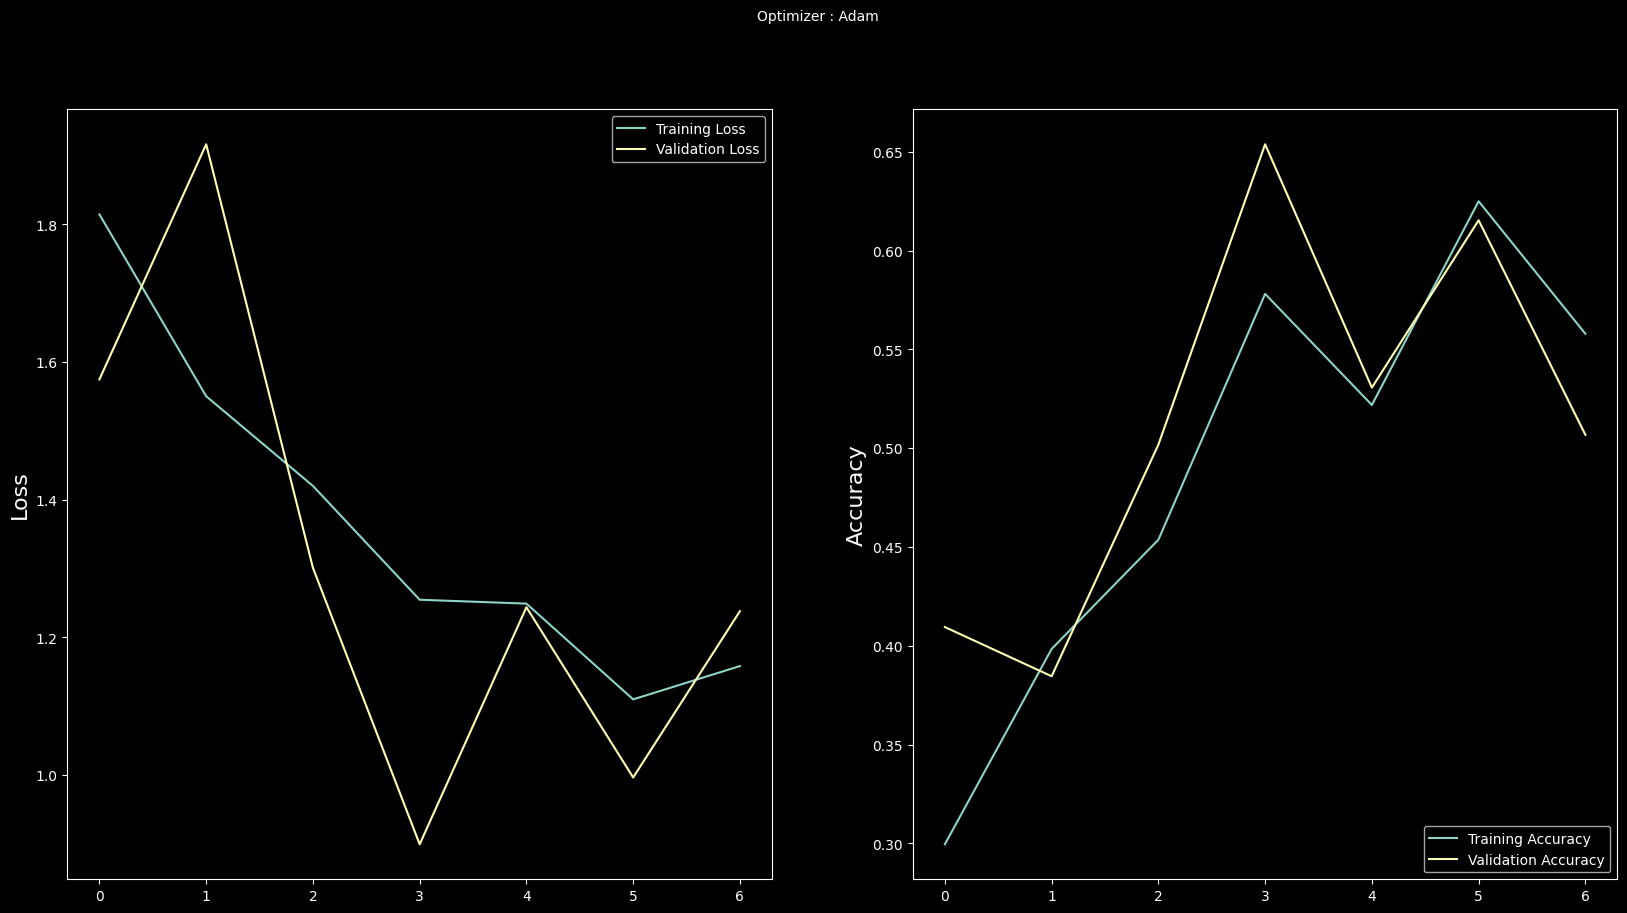

In [13]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()